In [1]:
import os

train_dir      = os.path.join('data', 'train')
validation_dir = os.path.join('data', 'validation')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size=20

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 400x400
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode="categorical")

Found 18424 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 32)      

In [9]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=18424//batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=4000//batch_size
      )

Epoch 1/20
921/921 [==============================] - 190s 206ms/step - loss: 0.5220 - accuracy: 0.8297 - val_loss: 0.0749 - val_accuracy: 0.9833
Epoch 2/20
921/921 [==============================] - 192s 209ms/step - loss: 0.0501 - accuracy: 0.9855 - val_loss: 0.0608 - val_accuracy: 0.9852
Epoch 3/20
921/921 [==============================] - 194s 211ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0930 - val_accuracy: 0.9735
Epoch 4/20
921/921 [==============================] - 191s 207ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0739 - val_accuracy: 0.9833
Epoch 5/20
921/921 [==============================] - 192s 209ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0585 - val_accuracy: 0.9858
Epoch 6/20
921/921 [==============================] - 192s 209ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.0835 - val_accuracy: 0.9820
Epoch 7/20
921/921 [==============================] - 189s 206ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.0769 -

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

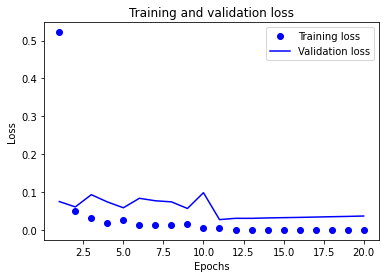

In [12]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

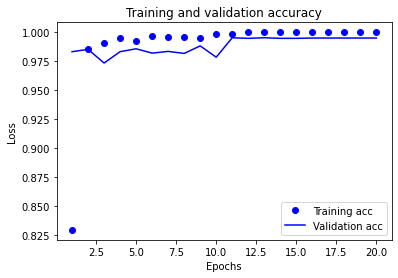

In [13]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model.save('baseCnn.h5')